***
# <font color=green>**Previsión de atrasos de vuelos**</h1>
***

## <font color=green>**01 - Explorando los datos**</h2>

In [1]:
import pandas as pd

In [2]:
datos =  pd.read_csv('data\\flights.csv')
datos.shape

(71175, 11)

In [3]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
# Validando estadisticas de las variables numericas del dataset
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
# Validando estadisticas de las variables categoricas del dataset
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

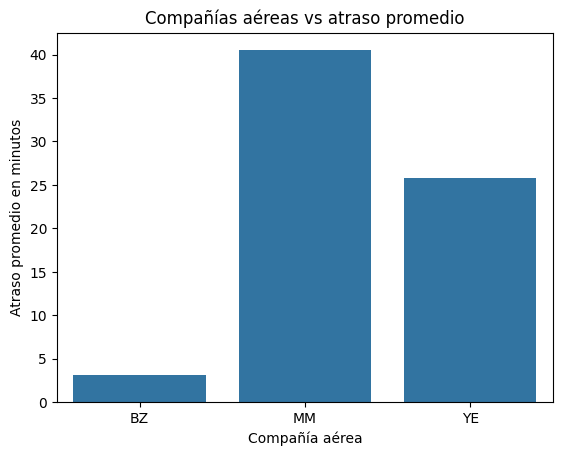

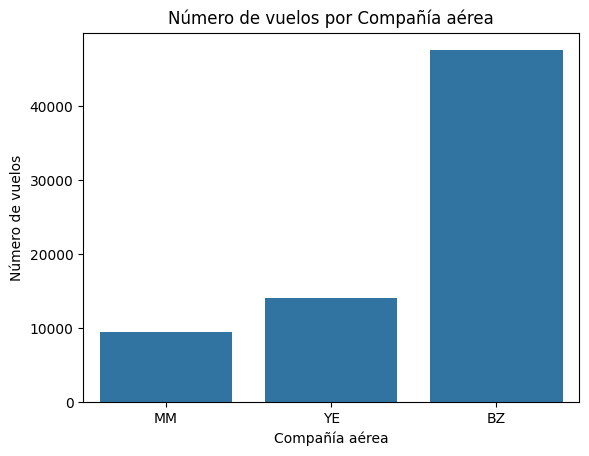

In [8]:
# Calculando los atrasos de vuelos con respecto a las aerolineas
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

# Creando grafico para ver el numero de vuelos por compañia aerea
sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

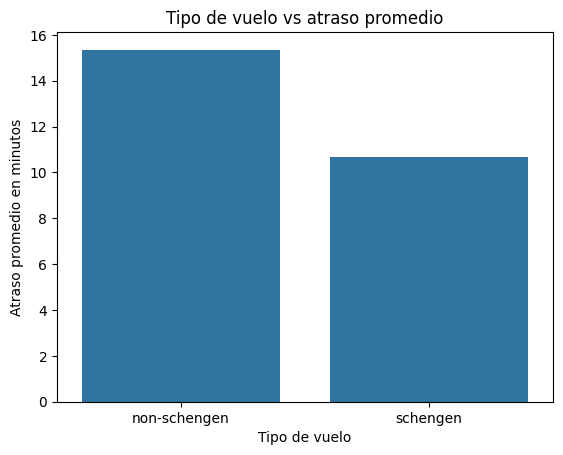

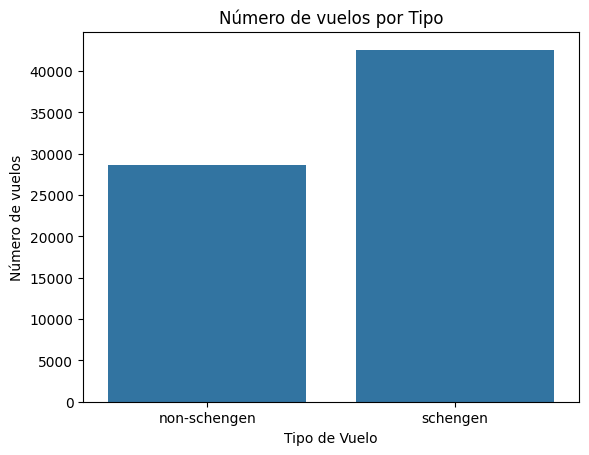

In [9]:
# Cantidad de atrasos de vuelos en espacio Schengen o no
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

# Conteo de atrasos de vuelos en espacio Schengen
sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

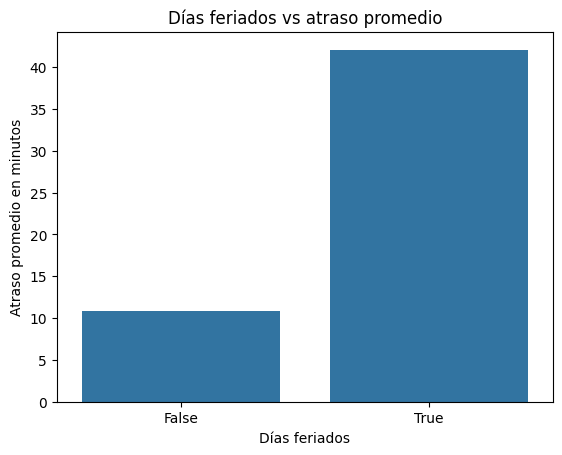

In [10]:
# Analisis si los atrasos ocurren en dias feriados o no
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [13]:
# Cantidad de naves que circulan por el aeropuerto
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

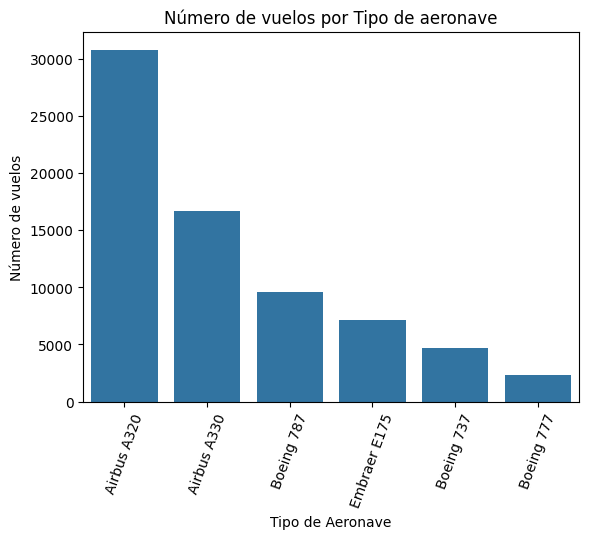

In [15]:
# Analisis de la cantidad de naves que circulan por el aeropuerto
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type',order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

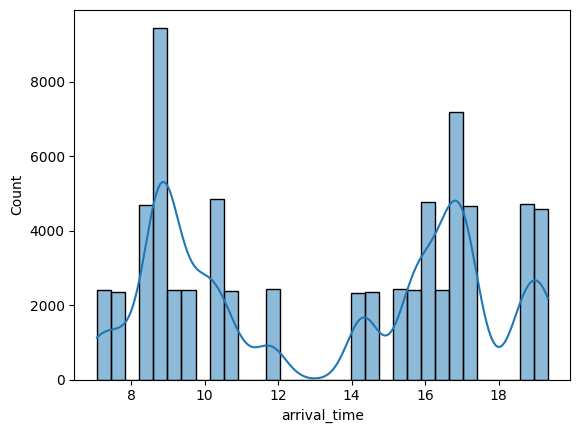

In [16]:
# Analizando la distribucion de los datos de horario de llegada con un histograma
sns.histplot(data=datos,x='arrival_time',kde=True)

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

<Axes: xlabel='arrival_time', ylabel='Count'>

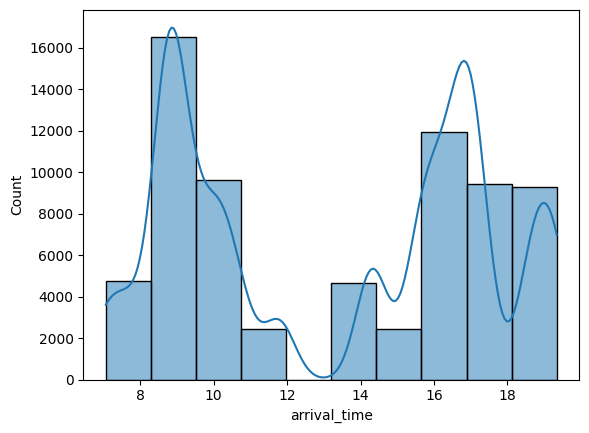

In [17]:
# Analizando la distribucion de los datos de horario de llegada con un histograma
sns.histplot(data=datos,x='arrival_time',kde=True,bins=10)

In [18]:
# Recreando la funcion de Freedman Diaconis con numpy
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

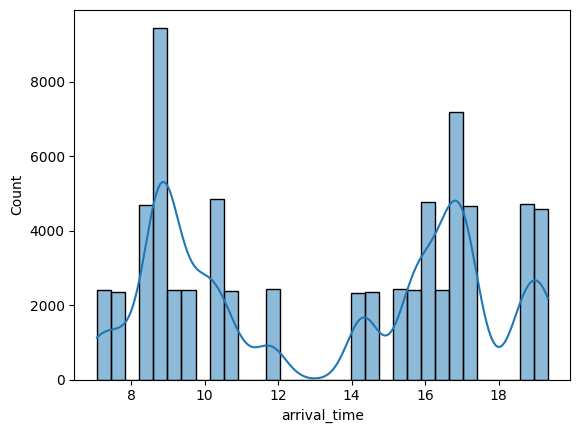

In [19]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

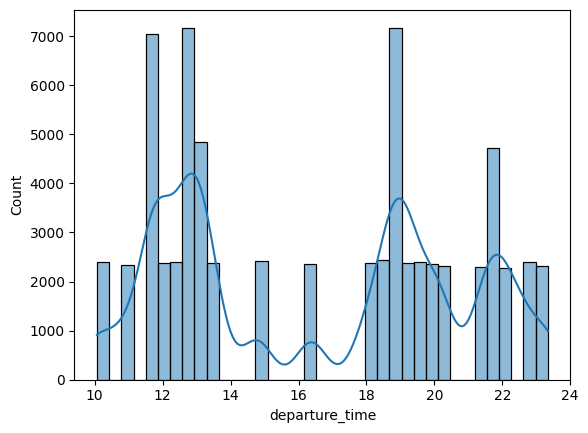

In [20]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

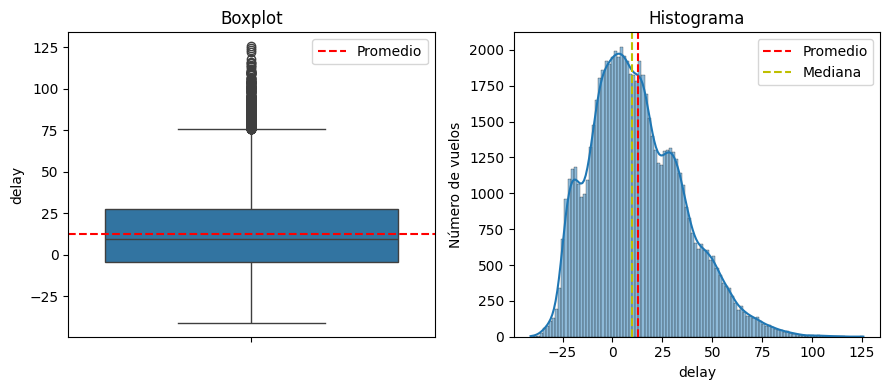

In [21]:
# Grafico de distribucion de la variable de respuesta, siendo esto los retrasos en los vuelos
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

## <font color=green>**02 - Feature engineering**

In [22]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [23]:
# Creando una columna llamada date
datos['date'] = datos['year'].astype(str) +'-'+(datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'],format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [24]:
# Creando una columna is_weekend para validar si es fin de semana o no
# Creando columna day_name para el nombre de la semana
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
38151,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,353,2016,False,-17.522722,2016-12-19,False,Monday
51854,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,171,2019,False,4.084421,2019-06-21,False,Friday
55066,24,BZ,Airbus A320,schengen,FJB,9.668655,12.668655,21,2020,False,44.923515,2020-01-22,False,Wednesday
15989,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,335,2012,False,51.191688,2012-12-01,True,Saturday
7748,12,YE,Airbus A330,schengen,TZF,17.313731,21.313731,151,2011,False,0.024707,2011-06-01,False,Wednesday


In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [26]:
import warnings

warnings.filterwarnings('ignore')

In [27]:
# Modificando los valores de algunas columnas
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
34070,26,MM,Airbus A320,0,TCY,8.885071,10.885071,81,2016,0,22.564661,2016-03-22,0,Tuesday
10482,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,333,2011,0,-10.982362,2011-11-30,0,Wednesday
23619,17,BZ,Airbus A330,0,CNU,16.718722,21.718722,114,2014,0,-9.010854,2014-04-25,0,Friday


In [28]:
# Colocando en una lista algunas valores
categoricas = ['airline','aircraft_type','origin','day_name']

# Metodo de Pandas para codificar con 0 y 1, de forma numerica
pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
# Almacenando en variable la codificacion realizada
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
1981,28,0,15.967963,17.967963,132,2010,0,15.746560,2010-05-13,0,...,0,0,0,0,0,0,0,1,0,0
66755,29,1,8.591208,11.591208,70,2022,0,25.418299,2022-03-12,1,...,0,0,1,0,0,1,0,0,0,0
50228,19,1,16.245220,19.245220,63,2019,0,59.237611,2019-03-05,0,...,0,1,0,0,0,0,0,0,1,0
66780,30,1,8.923441,12.923441,72,2022,0,11.734980,2022-03-14,0,...,0,0,0,0,1,0,0,0,0,0
1379,4,1,11.781391,14.781391,91,2010,1,40.827419,2010-04-02,0,...,1,0,0,1,0,0,0,0,0,0


In [30]:
# Metodo de correlaciones para validar datos entre horario de llegada y salida
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [31]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [32]:
# Eliminando variables del dataset para limpieza
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
57810,1,18.635384,0,-33.566950,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
53019,0,10.172731,0,-19.760557,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
45161,1,7.065594,0,23.414595,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14849,1,7.708301,0,16.683747,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
18700,1,14.258911,0,6.150043,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3196,1,7.708301,0,-18.700657,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
51327,0,19.341235,0,9.642732,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20107,1,18.635384,0,3.753556,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
62404,1,8.923441,0,-0.963149,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16126,1,16.909690,0,-3.901093,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## <font color=green>**03 - Selección y validación del modelo**

https://scikit-learn.org/stable/

In [33]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [34]:
# Generacion del modelo
X = df.drop(['delay'],axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

,strategy,'mean'
,constant,None
,quantile,None


In [35]:
# Evaluacion del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

In [36]:
# Creacion de funcion para el calculo de regresion
def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [37]:
# Generacion de varible para que reciba los datos
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [38]:
# Utilizando Random Forest para mejorar el baseline
from sklearn.ensemble import RandomForestRegressor

# Creando el modelo con Random Forest
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

In [44]:
import setuptools.dist

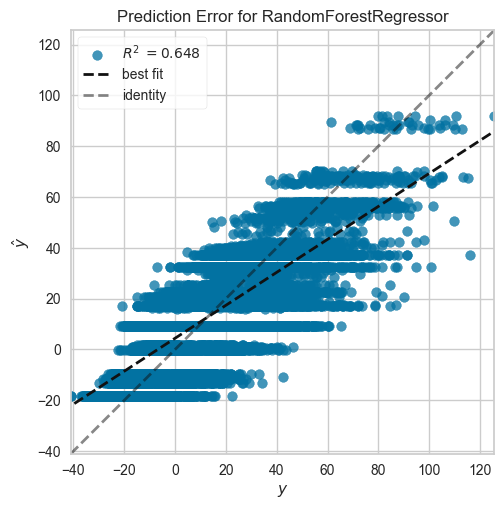

In [45]:
# Utilizando Yellowbrick para la visualizacion del modelo
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

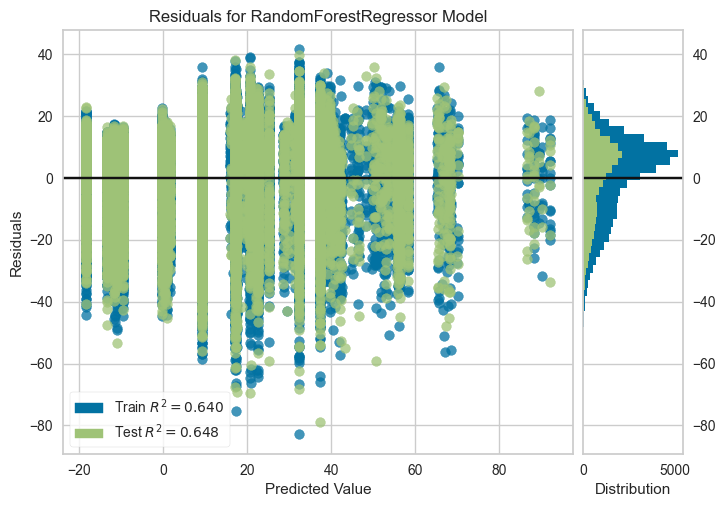

In [46]:
# Visualizando residuos del modelo Random Forest
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [47]:
# Dividiendo el conjunto de datos para entrenar y para probar con model_selection
from sklearn.model_selection import KFold, cross_validate

# Scoring para funcion de utilidad de sklearn
scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([4.47471476, 4.33375096, 4.3516109 , 3.86881876, 4.37295127]),
 'score_time': array([0.07320476, 0.06212115, 0.06035161, 0.06764674, 0.06692719]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}